In [2]:
import json
import urllib2 
from urllib import urlencode
from collections import Counter

file = open('datasets/token', 'r')
accessToken = file.read()

In [3]:
with open('datasets/policeGroups/users.json') as f:
    users = json.loads(f.read())

In [4]:
def chunker(lst, chunk_len):
    from_, to = 0, chunk_len
    while from_ < len(lst):
        yield lst[from_:to]
        from_ = to
        to += chunk_len

In [5]:
all_interests_data = []
chunk_size = 250

for i, user_chunk in enumerate(chunker(users, chunk_size)):
    user_ids = [u['uid'] for u in user_chunk]
    params = {"user_ids": user_ids, 
              # NOTE(si14): not enough data to analyse books/tv/movies/...
              # "fields": "personal,books,tv,movies,activities,interests",
              "fields": "personal",
              "access_token": accessToken}
    params_str = urlencode(params)

    url = "https://api.vk.com/method/users.get?" + params_str
    data = json.load(urllib2.urlopen(url))
    resp = data['response']
    
    all_interests_data += resp
    print "fetched chunk {}/{}".format(i+1, len(users) / chunk_size)
    

fetched chunk 1/6
fetched chunk 2/6
fetched chunk 3/6
fetched chunk 4/6
fetched chunk 5/6
fetched chunk 6/6
fetched chunk 7/6


In [35]:
with open('datasets/policeGroups/all_interests_data.json', 'wb') as f:
    f.write(json.dumps(all_interests_data))

In [6]:
counter_keys = ['religion', 'alcohol', 'smoking', 'political']
counters = {key: Counter() for key in counter_keys}

int_to_str_mappings = {
    'alcohol': {1: u"резко негативное",
                2: u"негативное",
                3: u"нейтральное",
                4: u"компромиссное",
                5: u"положительное",
                'n/a': u'не указано'},
    'smoking': {1: u"резко негативное",
                2: u"негативное",
                3: u"нейтральное",
                4: u"компромиссное",
                5: u"положительное",
                'n/a': u'не указано'},
    'political': {1: u"коммунистические",
                  2: u"социалистические",
                  3: u"умеренные",
                  4: u"либеральные",
                  5: u"консервативные",
                  6: u"монархические",
                  7: u"ультраконсервативные",
                  8: u"индифферентные",
                  9: u"либертарианские",
                  'n/a': u'не указаны'}}

n = 0
for user in all_interests_data:
    n += 1
    if not ('personal' in user and isinstance(user['personal'], dict)):
        continue
    personal = user['personal']
    for key in counters.keys():
        if key in personal:
            counter = counters[key]
            counter[personal[key]] += 1
        else:
            counter['n/a'] += 1

for key, counter in counters.items():
    print key
    for subkey, n in counter.most_common():
        if key in int_to_str_mappings:
            subkey = int_to_str_mappings[key][subkey]
        print "   {}: {}".format(subkey.encode('utf8'), n)

religion
   n/a: 45
   Православие: 45
   православный: 3
   верю: 2
   православие: 2
   присутствуют: 1
   Nothingdoing: 1
   Ислам: 1
   Никто не обязан сообщать о своем отношении к религии (ч.5 ст.3 ФЗ от 26.09.97 г. N 125-ФЗ): 1
   православные: 1
   Верю: 1
   Атеист: 1
   Будда укажет мне путь истины, Аллах направит мои стопы, а Иисус меня простит: 1
   Все думающие люди — атеисты. (Э.Хеммингуей): 1
   Омон: 1
   Католицизм: 1
   У каждого свой Бог в душе.: 1
   бог един: 1
   Светский гуманизм: 1
   Бог есть: 1
   Хрестианин: 1
   jedi knight: 1
   Я верю в Любовь,Веру,Надежду и конечно же в дружбу!: 1
   Религия-опиум для народа!: 1
   Духовность: 1
   Верю в себя: 1
   I am the GoD.....: 1
   в религиозных предпочтениях не определился: 1
   Христианские: 1
   Православное крыло Буддизма: 1
   Верующий: 1
   Бог использует то, что тянет нас назад, чтобы вести нас вперед: 1
   христианство: 1
   Готические: 1
   Бога нет. Есть вера в Бога. Она и творит чудеса...: 1
   православ

In [7]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [21]:
def make_plot(counter_key):
    counter = counters[counter_key]
    data = counter.most_common()
    data.reverse()

    df = pd.DataFrame(data=[x[1] for x in data], index=[int_to_str_mappings[counter_key][x[0]] for x in data])

    p = df.plot(kind='barh', color='#555577', legend=False)

    plt.xkcd()

    matplotlib.rc('xtick', labelsize=0)
    matplotlib.rc('ytick', labelsize=20)

    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off') # labels along the bottom edge are off
    plt.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        right='off') # labels along the bottom edge are off

    p.set_xlabel("")
    p.set_ylabel("")
    p.get_figure().set_size_inches(10, 6)
    p.get_figure().tight_layout()
    p.get_figure().savefig('images/personal_{}_police.png'.format(counter_key), dpi=100)


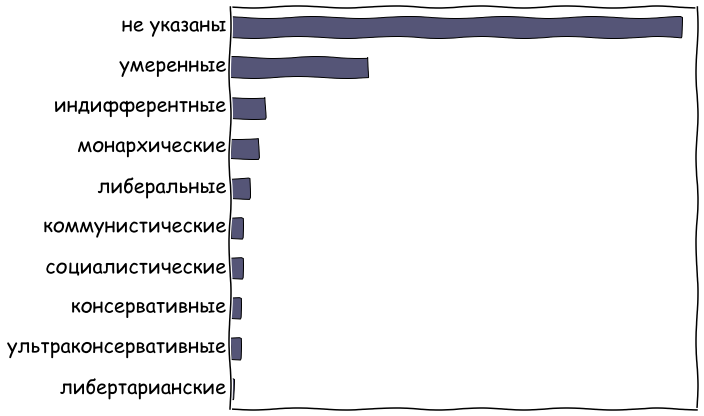

In [16]:
%matplotlib inline

counter_key = 'political'
counter = counters['political']
data = counter.most_common()
data.reverse()

df = pd.DataFrame(data=[x[1] for x in data], index=[int_to_str_mappings['political'][x[0]] for x in data])

p = df.plot(kind='barh', color='#555577', legend=False)

plt.xkcd()

matplotlib.rc('xtick', labelsize=0)
matplotlib.rc('ytick', labelsize=20)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left='off',      # ticks along the bottom edge are off
    right='off') # labels along the bottom edge are off

p.set_xlabel("")
p.set_ylabel("")
p.get_figure().set_size_inches(10, )
p.get_figure().tight_layout()
p.get_figure().savefig('images/personal_{}_police.png'.format(counter_key), dpi=100)

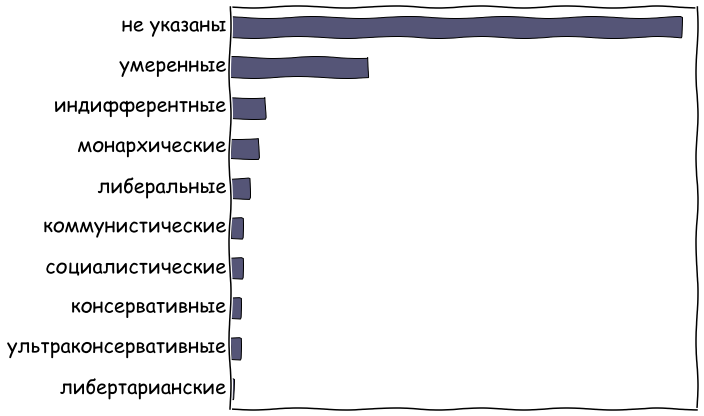

In [19]:
%matplotlib inline

make_plot('political')

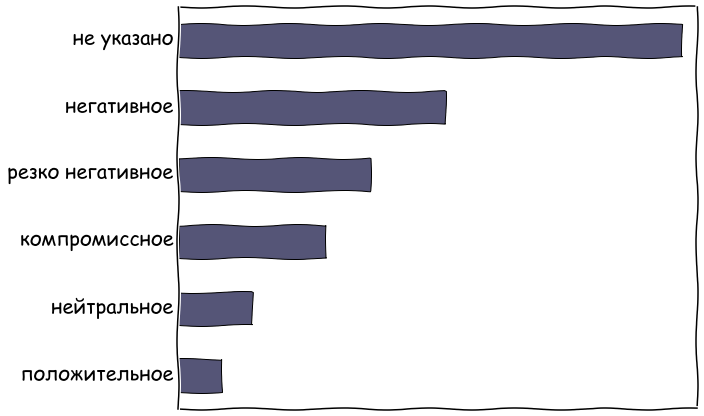

In [22]:
%matplotlib inline

make_plot('smoking')

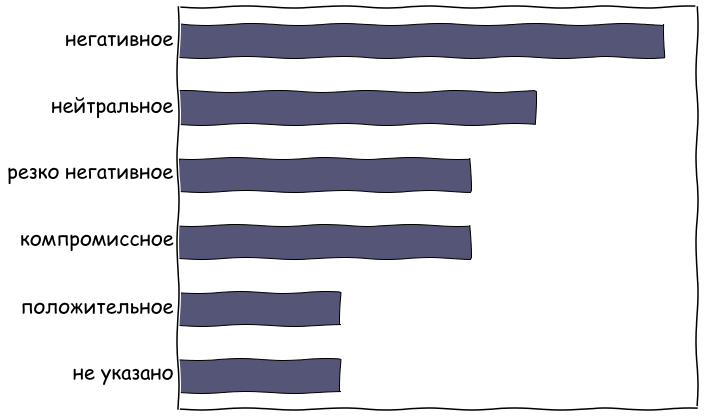

In [23]:
%matplotlib inline

make_plot('alcohol')